In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")
df = pd.read_csv(r'FB.csv', parse_dates = True)


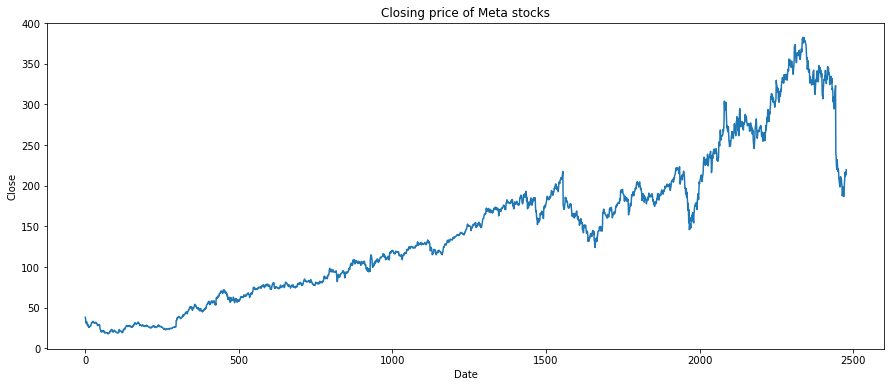

In [2]:
df["Close"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of Meta stocks") 
plt.show()

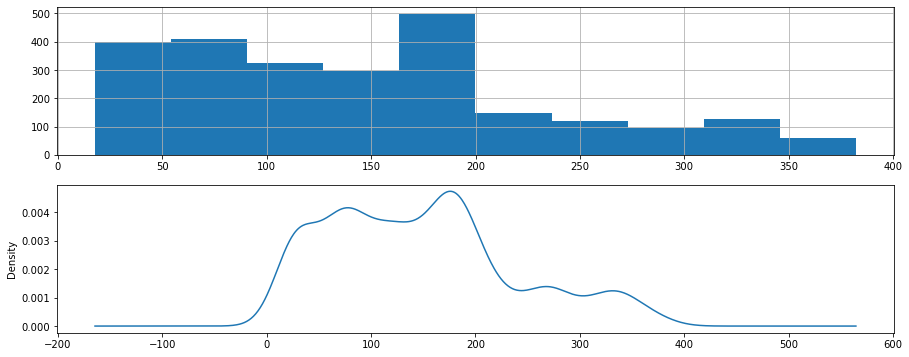

In [3]:
plt.figure(1, figsize=(15,6)) 
plt.subplot(211) 
df["Close"].hist() 
plt.subplot(212) 
df["Close"].plot(kind='kde') 
plt.show()

In [4]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
        def mean_absolute_percentage_error(y_true, y_pred):       
            y_true, y_pred = np.array(y_true), np.array(y_pred)        
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100    
        print('Evaluation metric results:-')    
        print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')    
        print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
        print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
        print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
        print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [5]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]
stepwise_model = auto_arima(train,start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,    d=None, trace=True,error_action='ignore',suppress_warnings=True,stepwise = True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13625.180, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13630.372, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13625.775, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13626.078, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13629.373, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13626.808, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13623.507, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13626.681, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13622.458, Time=1.76 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13607.939, Time=1.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13608.754, Time=0.68 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=13608.359, Time=1.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13609.133, Time=2.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13609.130, Time=1.36 sec
 ARIMA(4,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2449
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -6797.841
Date:                Sat, 30 Jul 2022   AIC                          13607.681
Time:                        02:11:29   BIC                          13642.499
Sample:                             0   HQIC                         13620.335
                               - 2449                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0827      0.150      7.197      0.000       0.788       1.377
ar.L2         -0.3431      0.137     -2.501      0.012      -0.612      -0.074
ar.L3         -0.0959      0.014     -7.053      0.000      -0.123      -0.069
ma.L1         -1.1388      0.152     -7.507      0.000      -1.436      -0.841
ma.L2          0.4229      0.142      2.984      0.003       0.145       0.701
sigma2        15.1181      0.095    158.929      0.000      14.932      15.305
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1013629.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              25.00   Skew:                            -4.64
Prob(H) (two-sided):                  0.00   Kurtosis:                       102.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Evaluation metric results:-
MSE is : 1183.1642849510108
MSE is : 32.72195933447825
RMSE is : 34.39715518689025
MAPE is : 16.180159912418315
R2 is : -9.159224446932342



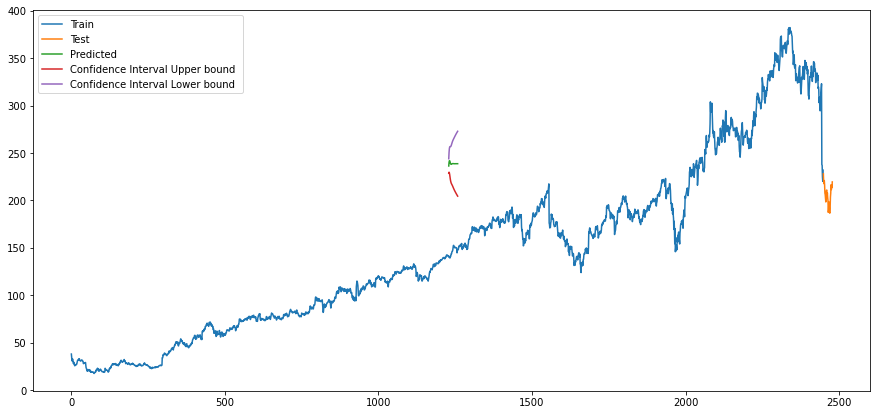

In [9]:
forecast,conf_int = stepwise_model.predict(n_periods=30, return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound', 'Lower_bound'])
df_conf["new_index"] = range(1229, 1259)
df_conf = df_conf.set_index("new_index")
timeseries_evaluation_metrics_func(test, forecast)
forecast["new_index"] = range(1229, 1259) 
forecast = forecast.set_index("new_index")
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline') 
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ') 
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

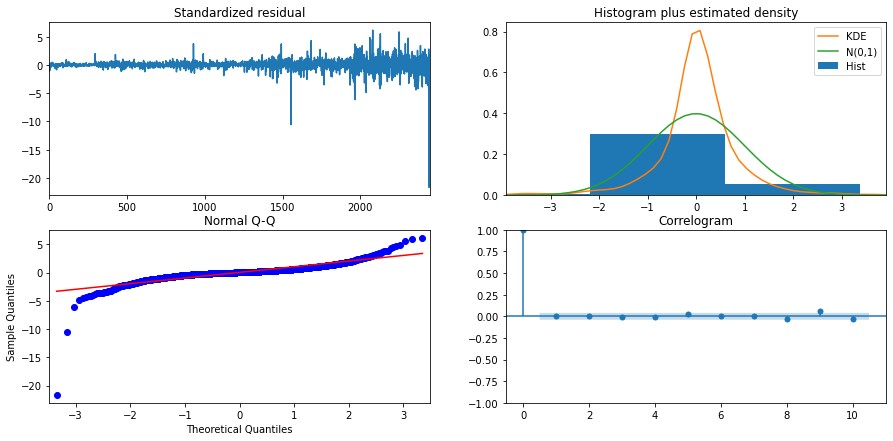

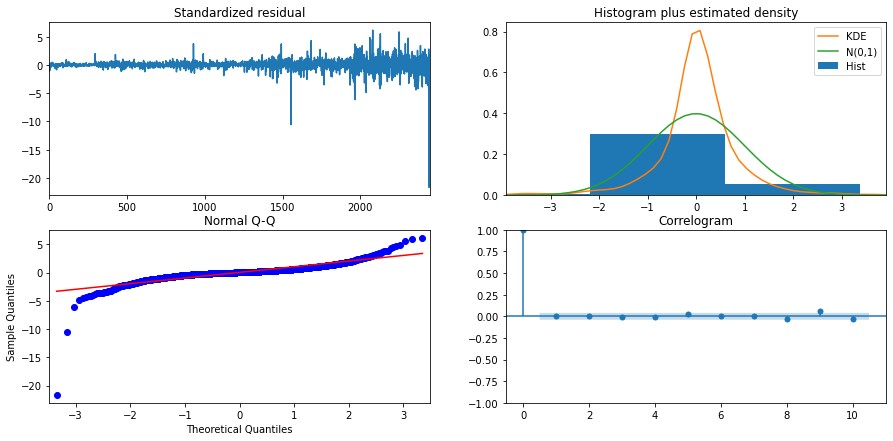

In [10]:
stepwise_model.plot_diagnostics()